
                                                                           
   # <center>Breast Cancer-SVC model </center>               

 # <center>By Maryam Madadgar</center>

# Introduction

# Reseasrch Objective
Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

The objective is to predict based on diagnostic measurements whether a patient has cancer.In this project, the impact of 5 factors(see in data source) is reviewed on cancer diagnosis(0 or one). 
# Research question
1.Predicting diagnosis of breast cancer by using mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness factors.
2.Evaluating of accuracy of SVC algorithm for this prediction. Also,Investigating of algorithm improvement by GridSearthCV implementation.

# Data source
The data set was sourced from https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset.
Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.
Dataset for AI for Social Good: Women Coders' Bootcamp organized by Artificial Intelligence for Development in collaboration with UNDP Nepal'.
Factors in this data set is: mean_radius,mean_texture, mean_perimeter, mean_area, mean_smoothness.

diagnosis: The diagnosis of breast tissues (1 = malignant, 0 = benign) where malignant denotes that the disease is harmful

mean_radius: mean of distances from center to points on the perimeter

mean_texture: standard deviation of gray-scale values

mean_perimeter: mean size of the core tumor

mean_area: mean area of the core tumor

mean_smoothness: mean of local variation in radius lengths
   


# Analyze data by descriptive statistics and graphical visualization.

In [45]:
# Import the following packages

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC


In [46]:
import warnings
warnings.filterwarnings('ignore')

BreastCancerData = pd.read_csv('Breast_cancer_data.csv')
print(BreastCancerData.shape)
print(BreastCancerData.head())

(569, 6)
   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  


In [47]:
# Print the summary of the data

print(BreastCancerData.describe())
print(BreastCancerData.describe())

       mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       569.000000  569.000000  
mean          0.096360    0.627417  
std           0.014064    0.483918  
min           0.052630    0.000000  
25%           0.086370    0.000000  
50%           0.095870    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000  
       mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.0000

In [48]:
# Print the datatypes which are keys.
types = BreastCancerData.dtypes
print(types)
print("Keys of Breast Cancer dataset:\n", BreastCancerData.keys())

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object
Keys of Breast Cancer dataset:
 Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')


In [49]:
# print the target variable

print("diagnosis:", BreastCancerData['diagnosis'])

diagnosis: 0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


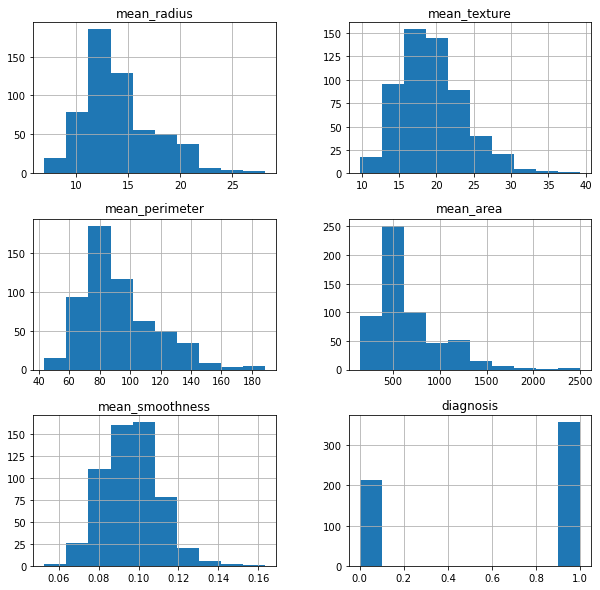

In [50]:
# Create the histogram of all the variables. Set Figure size 10 by 10 inches

%matplotlib inline
BreastCancerData.hist(figsize = (10,10))
plt.show()

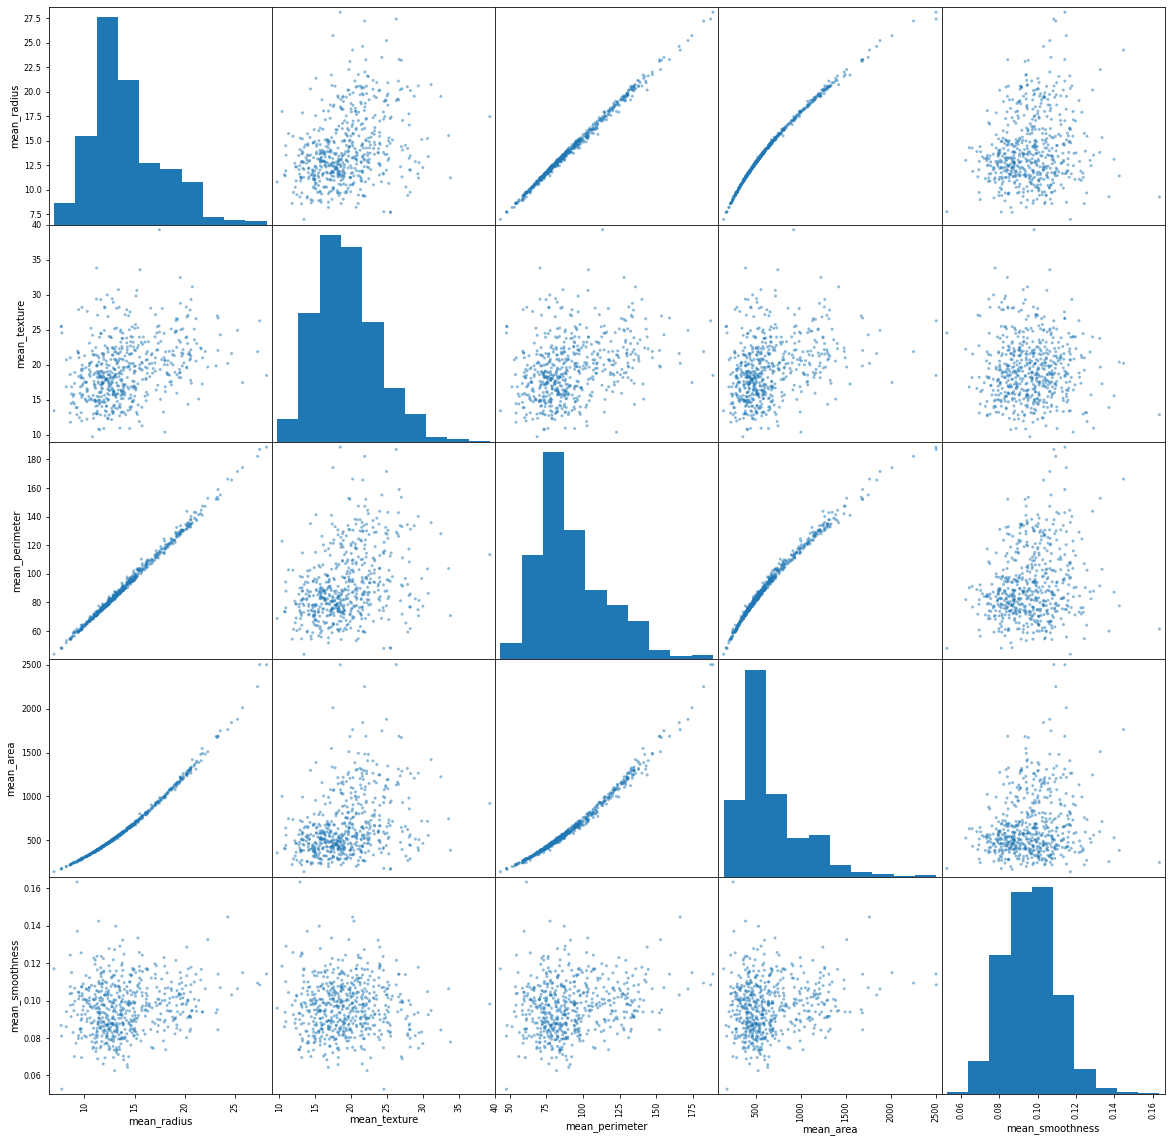

In [51]:
# create a grid of scatterplot and histogram

%matplotlib inline
X = BreastCancerData[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness']]
from pandas.plotting import scatter_matrix
scatter_matrix(X,figsize=(20,20))
plt.show() 

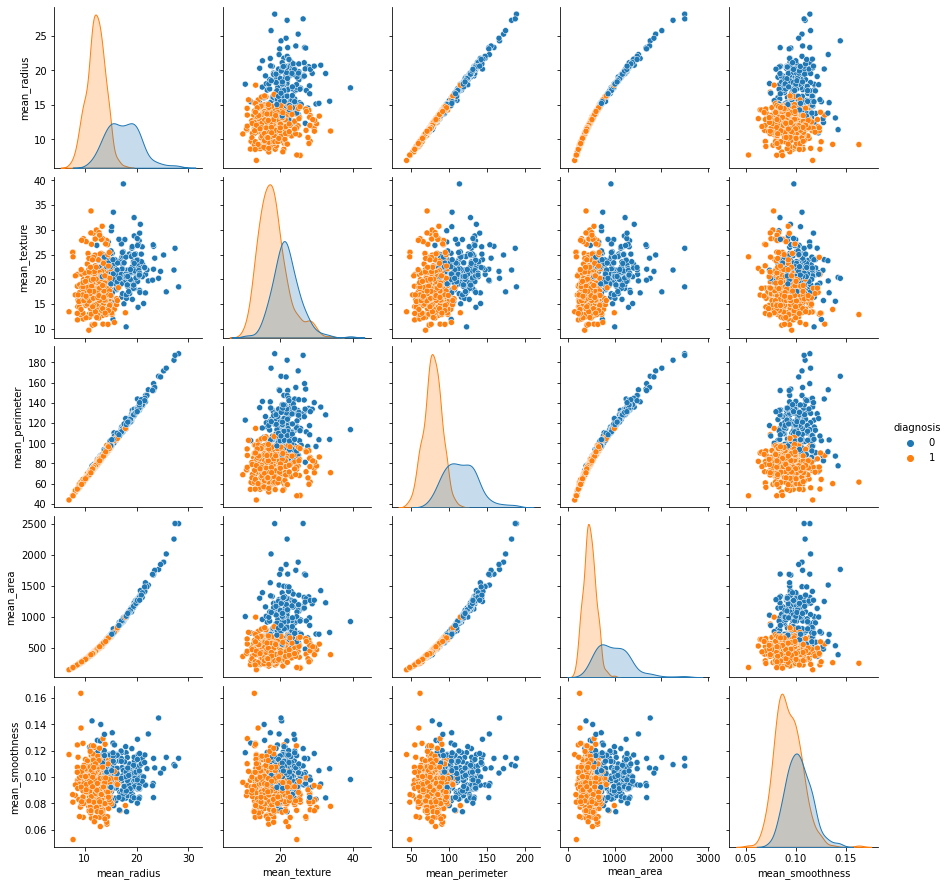

In [52]:
# Creating a pairplot differentiatied by diagnosis

%matplotlib inline
X = BreastCancerData[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness','diagnosis']] 
from pandas.plotting import scatter_matrix
sns.pairplot(X, hue = 'diagnosis')
plt.show() 

# Algorithm Implementation 

###  Preparing data 

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Divide data into predictor features vector and the label of the target variable 'diagnosis'

X = BreastCancerData[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness']] 
y = BreastCancerData[['diagnosis']]

# Check if null values in the columns
X.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
dtype: int64

In [54]:
# Divide data into predictor features vector and the label of the trget variable 'diagnosis'

x= BreastCancerData.drop(['diagnosis'], axis=1)
y = BreastCancerData['diagnosis']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1=scaler.fit_transform(x)


# Dividing data into two subsets :train and test set.Training set trains the model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, random_state=1)





### Train Data and  Testing the data using SVC

In [55]:
# polynomial kernel

from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=2, gamma='auto')
svclassifier.fit(x_train, y_train)

SVC(degree=2, gamma='auto', kernel='poly')

In [56]:
y_pred = svclassifier.predict(x_test)

In [57]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[ 6 36]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        42
           1       0.67      1.00      0.80        72

    accuracy                           0.68       114
   macro avg       0.83      0.57      0.53       114
weighted avg       0.79      0.68      0.60       114

Accuracy: 0.6842105263157895


In [58]:
# RBF kernel

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', gamma='auto')
svclassifier.fit(x_train, y_train)

SVC(gamma='auto')

In [59]:
y_pred = svclassifier.predict(x_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[34  8]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        42
           1       0.90      0.97      0.93        72

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

Accuracy: 0.9122807017543859


## Hyperparameters tuning

In [61]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['linear', 'rbf', 'poly'], 'C':[1, 5, 10]}

svc = SVC()

clf = GridSearchCV(svc, param_grid = parameters, cv = 3, verbose=True, n_jobs=-1)

final_clf = clf.fit(x_train, y_train)


print(sorted(final_clf.cv_results_.keys()))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


In [62]:
print(final_clf.best_estimator_)
print(final_clf.best_params_)

SVC(C=1)
{'C': 1, 'kernel': 'rbf'}


In [63]:
 #Using the best parameters from the above GridSearchCV
# we build another svc model

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf', C=1)
svc.fit(x_train, y_train) # fiting the data to the model

svc.fit(x_train, y_train) # fiting the data to the model
y_pred = svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[34  8]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        42
           1       0.90      0.97      0.93        72

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

Accuracy: 0.9122807017543859


# Conclusion

In this project we have explored breast cancer diagnosis (0 means no diagnosis, 1 means yes diagnosis) with some factors: mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness. The research used SVC algorithm model on dataset, to identify what outcome was predicted (0 means no diagnosis, 1 means yes diagnosis). I found its accuracy. In this search, by GridSearchCV method I found the best parameters and hyperparameters in SVC. I found the best accuracy equal to 91% for this dataset with SVC and  Kernel=’rbf’ and C=1 hyperparameters.

# Refrences

 
 1. https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset
 2.https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
 3.https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html